# Setup, loading and plotting functions

In [216]:
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import deepdish as dd
import scipy
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

In [17]:
def load(exp):
    step_names = glob.glob("results/{}/{}/*.npy".format(exp,'position'))
    step_list = np.sort([int(s.split(".npy")[0].split("/")[-1]) for s in step_names])
    
    position = []
    velocity = []
    for step in step_list:
        position.append(np.load("results/{}/{}/{}.npy".format(exp,'position', step)))
        velocity.append(np.load("results/{}/{}/{}.npy".format(exp,'velocity', step)))
    return np.vstack(position), np.vstack(velocity)

In [220]:
def hessian(exp):
    H = np.load("results/{}/hessian.npy".format(exp))
    W, V = np.linalg.eigh(H)
    return W, V

In [279]:
p, v = load('classification')

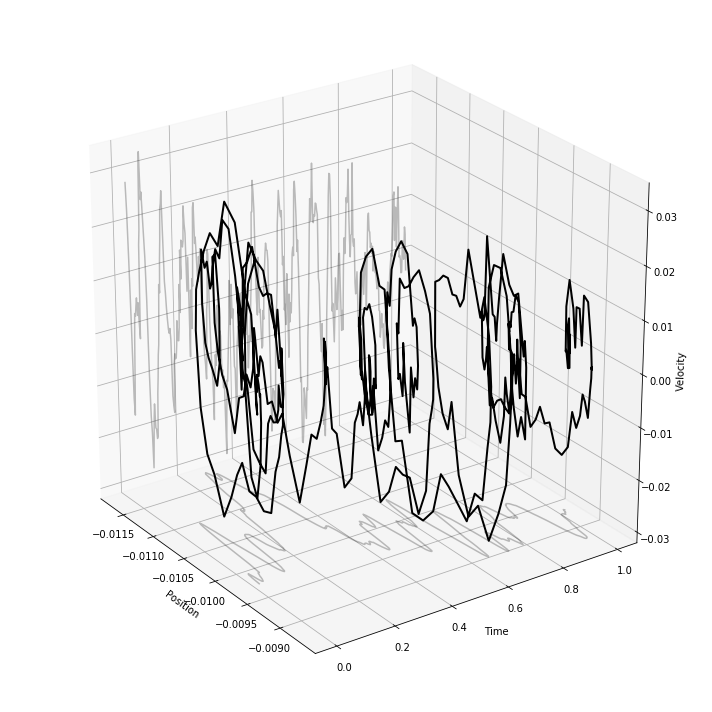

In [294]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

# k=np.shape(p)[0]
k = 400
idx = -40
time = np.linspace(0,1,k) 
ax.plot(p[-k:,idx], time, v[-k:,idx], lw=2, color='k')
ax.plot(p[-k:,idx], time, min(v[-k:,idx])*np.ones(k), color='k', alpha=0.25)
ax.plot(min(p[-k:,idx])*np.ones(k), time, v[-k:,idx], color='k', alpha=0.25)

ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('Velocity')
ax.view_init(elev=25., azim=-35)

# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.5, 1, 0.5, 0.75]))
plt.tight_layout()
# plt.savefig('bias-oscillations-3d.png', format='png', bbox_inches='tight', transparent=True)

In [282]:
p, v = load('classification')
W, U = hessian('classification')

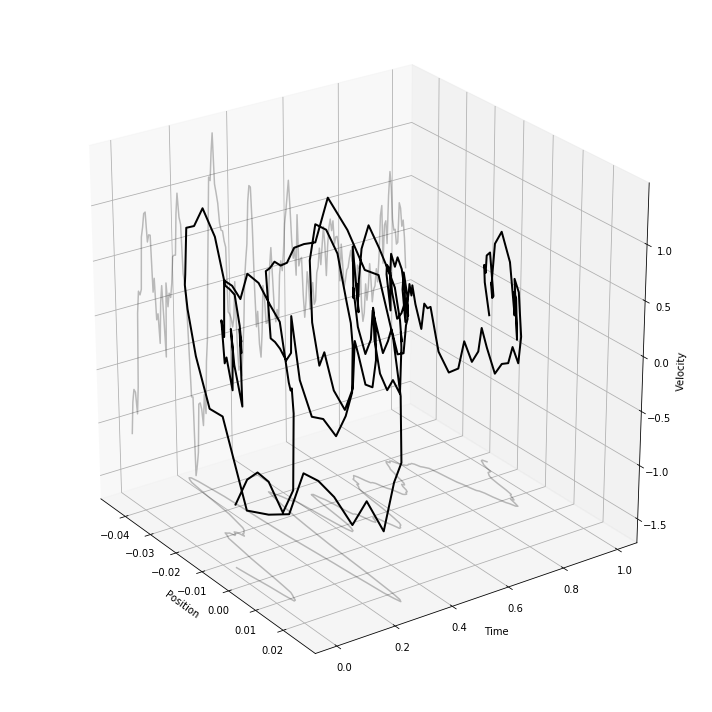

In [298]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

k=np.shape(p)[0]
k = 200
idx = 1

x = p[-k:,:].dot(U[:,-idx])
y = v[-k:,:].dot(U[:,-idx])

time = np.linspace(0,1,k) 

ax.plot(x, time, y, lw=2, color='k')
ax.plot(x, time, min(y)*np.ones(k), color='k', alpha=0.25)
ax.plot(min(x)*np.ones(k), time, y, color='k', alpha=0.25)

ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('Velocity')
ax.view_init(elev=25., azim=-35)

# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.5, 1, 0.5, 0.75]))
plt.tight_layout()
# plt.savefig('bias-oscillations-3d.png', format='png', bbox_inches='tight', transparent=True)

In [329]:
p, v = load('classification')
U = np.load("results/classification/eigenvector.npy")

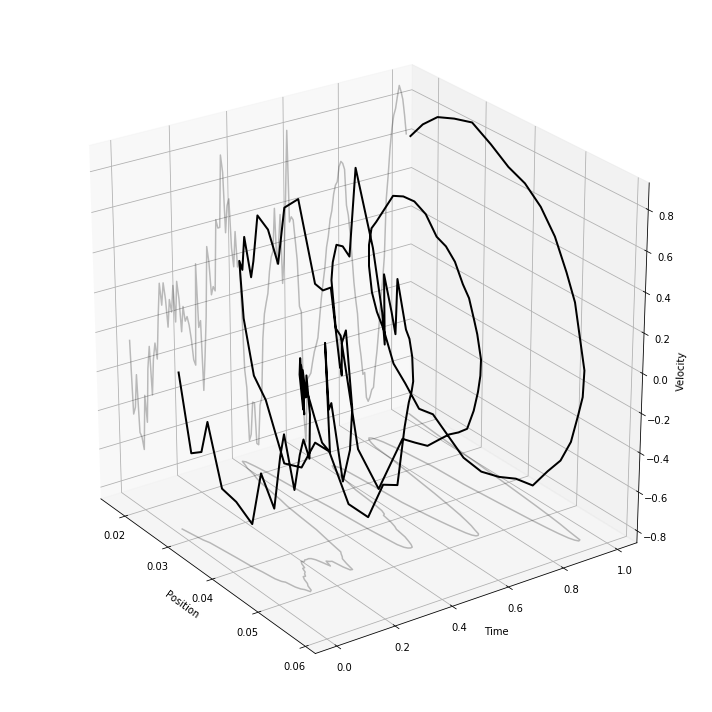

In [330]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

k=np.shape(p)[0]
k = 150
idx = 1

x = p[-k:,:].dot(U)
y = v[-k:,:].dot(U)

time = np.linspace(0,1,k) 

ax.plot(x, time, y, lw=2, color='k')
ax.plot(x, time, min(y)*np.ones(k), color='k', alpha=0.25)
ax.plot(min(x)*np.ones(k), time, y, color='k', alpha=0.25)

ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('Velocity')
ax.view_init(elev=25., azim=-35)

# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.5, 1, 0.5, 0.75]))
plt.tight_layout()
# plt.savefig('bias-oscillations-3d.png', format='png', bbox_inches='tight', transparent=True)

# Regression Plots

In [300]:
p, v = load('regression')

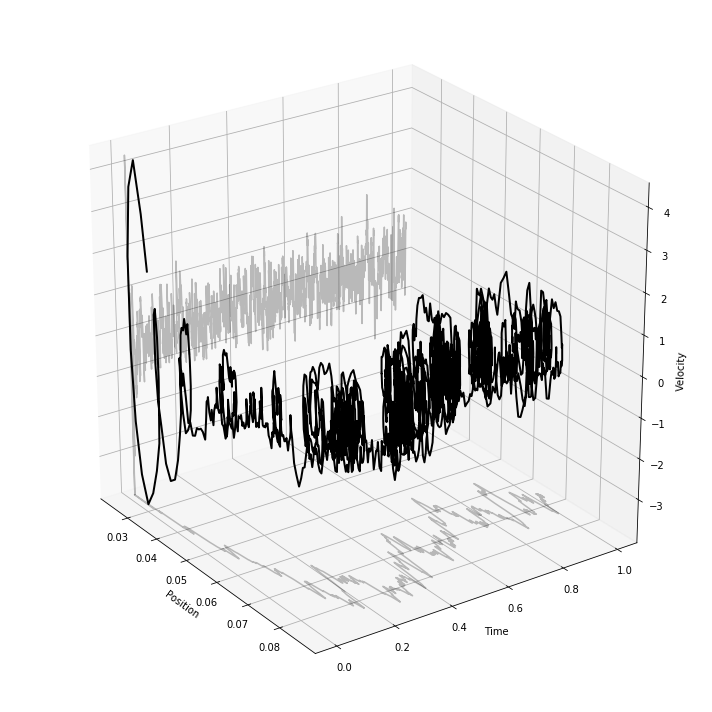

In [317]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

k=np.shape(p)[0]
# k = 50
idx = 100
time = np.linspace(0,1,k) 
ax.plot(p[-k:,idx], time, v[-k:,idx], lw=2, color='k')
ax.plot(p[-k:,idx], time, min(v[-k:,idx])*np.ones(k), color='k', alpha=0.25)
ax.plot(min(p[-k:,idx])*np.ones(k), time, v[-k:,idx], color='k', alpha=0.25)

ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('Velocity')
ax.view_init(elev=25., azim=-35)

# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.5, 1, 0.5, 0.75]))
plt.tight_layout()
# plt.savefig('bias-oscillations-3d.png', format='png', bbox_inches='tight', transparent=True)

In [302]:
p, v = load('regression')
W, U = hessian('regression')

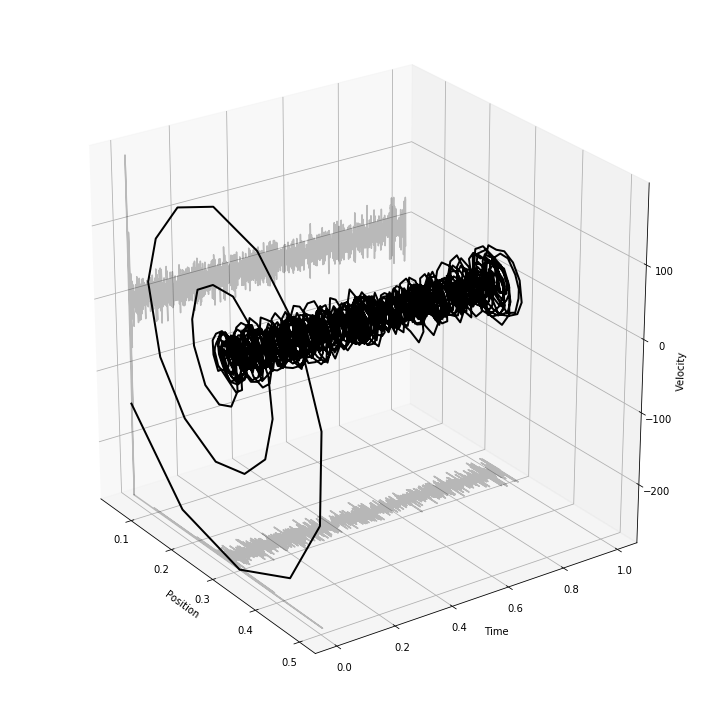

In [312]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

k=np.shape(p)[0]
# k = 50
idx = 1

x = p[-k:,:].dot(U[:,-idx])
y = v[-k:,:].dot(U[:,-idx])

time = np.linspace(0,1,k) 

ax.plot(x, time, y, lw=2, color='k')
ax.plot(x, time, min(y)*np.ones(k), color='k', alpha=0.25)
ax.plot(min(x)*np.ones(k), time, y, color='k', alpha=0.25)

ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('Velocity')
ax.view_init(elev=25., azim=-35)

# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.5, 1, 0.5, 0.75]))
plt.tight_layout()
# plt.savefig('bias-oscillations-3d.png', format='png', bbox_inches='tight', transparent=True)